In [1]:
# import sys
# !{sys.executable} -m pip install scikit-plot==0.3.7

In [16]:
import pandas as pd
import numpy as np
import pickle
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import scikitplot as skplt
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics


In [3]:
# Load Dataset
# Author: John Lee 
# This notebook is to perform EDA on LoL dataset available from Kaggle
# URL for the dataset: https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
# Load Dataset
wDir = os.getcwd()
df = pd.read_csv(os.path.join(wDir, 'cleaned_df.csv'))

In [4]:
def data_prep(df):
    y = df['blueWins']
    X = df.drop('blueWins', axis = 1)
    scaler = MinMaxScaler()
    scaler.fit(X)
    X_sc = scaler.transform(X)
    
    # Split the dataset into train and test. By default the ratio is 70/30
    # Ratio can be hard-coded into different values
    
    X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test

In [20]:
def display_metrics(classifierName,Y_pred,Y_true):
    print("______________________________________________")
    print(("Classifier: "+classifierName))
    if np.array_equal(Y_pred,Y_true):
        print("Match")
        
    acc, precision, recall, f1score = classification_metrics(Y_pred,Y_true)
    mc_points = Y_pred==Y_true
    mc_p=np.size(mc_points) - np.count_nonzero(mc_points)
    print(("Accuracy: "+str(acc)))
    #print(("AUC: "+str(auc_)))
    print(("Precision: "+str(precision)))
    print(("Recall: "+str(recall)))
    print(("F1-score: "+str(f1score)))
    #print(("Misclassified Points: "+str(mc_p)))
    
    print("______________________________________________")
    print("")
    
    return acc, precision, recall, f1score

In [21]:
def classification_metrics(Y_pred,Y_true):
    cnf_matrix = metrics.confusion_matrix(Y_true, Y_pred)
    accuracy=metrics.accuracy_score(Y_true, Y_pred)
    precision=metrics.precision_score(Y_true, Y_pred)
    recall=metrics.recall_score(Y_true, Y_pred)
    fscore=metrics.f1_score(Y_true, Y_pred)
    #auc = metrics.roc_auc_score(Y_true, Y_pred,average='micro')
    return accuracy,precision,recall,fscore

In [5]:
X_train, X_test, y_train, y_test = data_prep(df)

In [6]:
# Load Models
rf_model = pickle.load(open(os.path.join(wDir, 'models', 'rfc_model.sav'), 'rb'))
logReg_model = pickle.load(open(os.path.join(wDir, 'models', 'logReg_model.sav'), 'rb'))
xgb_model = pickle.load(open(os.path.join(wDir, 'models', 'XGB_model.sav'), 'rb'))

In [7]:
# Make Prediction
y_rf_pred = rf_model.predict(X_test)
y_lr_pred = logReg_model.predict(X_test)
y_xgb_pred = xgb_model.predict(X_test)

<AxesSubplot:title={'center':'Confusion Matrix for XGBoost'}, xlabel='Predicted label', ylabel='True label'>

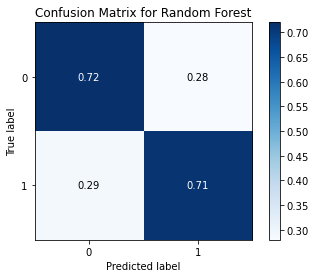

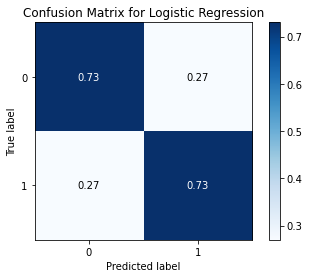

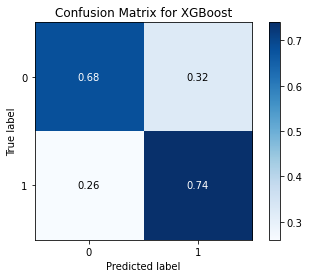

In [8]:
skplt.metrics.plot_confusion_matrix(y_test, y_rf_pred, normalize= True, title = 'Confusion Matrix for Random Forest')
skplt.metrics.plot_confusion_matrix(y_test, y_lr_pred, normalize= True, title = 'Confusion Matrix for Logistic Regression')
skplt.metrics.plot_confusion_matrix(y_test, y_xgb_pred, normalize= True, title = 'Confusion Matrix for XGBoost')

In [9]:
y_rf_proba = rf_model.predict_proba(np.array(X_test))[:,1]
y_lr_proba = logReg_model.predict_proba(np.array(X_test))[:,1]
y_xgb_proba = xgb_model.predict_proba(np.array(X_test))[:,1]

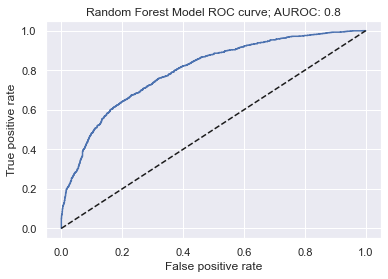

In [10]:
fpr, tpr, thresholds = roc_curve(y_test, y_rf_proba)
sns.set()
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
AUROC = np.round(roc_auc_score(y_test, y_rf_proba), 2)
plt.title(f'Random Forest Model ROC curve; AUROC: {AUROC}');
plt.show()

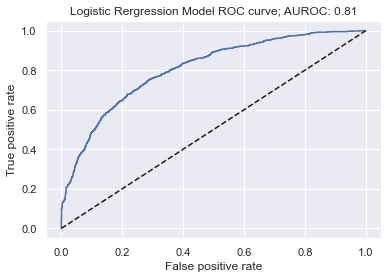

In [11]:
fpr, tpr, thresholds = roc_curve(y_test, y_lr_proba)
sns.set()
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
AUROC = np.round(roc_auc_score(y_test, y_lr_proba), 2)
plt.title(f'Logistic Rergression Model ROC curve; AUROC: {AUROC}');
plt.show()

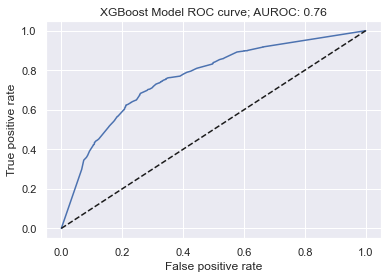

In [12]:
fpr, tpr, thresholds = roc_curve(y_test, y_xgb_proba)
sns.set()
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
AUROC = np.round(roc_auc_score(y_test, y_xgb_proba), 2)
plt.title(f'XGBoost Model ROC curve; AUROC: {AUROC}');
plt.show()

In [22]:
display_metrics('Logistic Regression',y_lr_pred, y_test)
display_metrics('Random Forest Classifier',y_rf_pred, y_test)
display_metrics('XGBoost Classifier',y_xgb_pred, y_test)

______________________________________________
Classifier: Logistic Regression
Accuracy: 0.7290823211875843
Precision: 0.7283702213279678
Recall: 0.7318059299191375
F1-score: 0.7300840336134454
______________________________________________

______________________________________________
Classifier: Random Forest Classifier
Accuracy: 0.717948717948718
Precision: 0.720108695652174
Recall: 0.7142857142857143
F1-score: 0.7171853856562923
______________________________________________

______________________________________________
Classifier: XGBoost Classifier
Accuracy: 0.7074898785425101
Precision: 0.6968730057434588
Recall: 0.7358490566037735
F1-score: 0.7158308751229105
______________________________________________



(0.7074898785425101,
 0.6968730057434588,
 0.7358490566037735,
 0.7158308751229105)